In [1]:
import diffprivlib.models as dp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
dataset = datasets.load_breast_cancer ()


In [2]:
X = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                     usecols=(0, 2, 3, 6, 7, 10, 11, 12, 13, 16, 17, 20, 21), delimiter=",")
y = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                     usecols=1, dtype=str, delimiter=",")

In [3]:
np.unique(y)

array(['B', 'M'], dtype='<U1')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [5]:
np.unique(y_test)

array(['B', 'M'], dtype='<U1')

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(solver="lbfgs"))
])

In [7]:
lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [8]:
print("Non-private test accuracy: %.2f%%" % 
     ((lr.predict(X_test) == y_test).sum() / y_test.shape[0] * 100))

Non-private test accuracy: 93.57%


In [9]:
dp_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', dp.LogisticRegression())
])

dp_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:213: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=1.0, data_norm=2.448354417842487,
                                    epsilon=1.0, fit_intercept=True,
                                    max_iter=100, n_jobs=None, tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [10]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_lr['clf'].epsilon, (dp_lr.predict(X_test) == y_test).sum() / y_test.shape[0] * 100))

Differentially private test accuracy (epsilon=1.00): 63.74%


In [11]:
dp_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', dp.LogisticRegression(epsilon=float("inf"), data_norm=2))
])

dp_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=1.0, data_norm=2, epsilon=inf,
                                    fit_intercept=True, max_iter=100,
                                    n_jobs=None, tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
print("Agreement between non-private and differentially private (epsilon=inf) classifiers: %.2f%%" % 
     ((lr.predict(X_test) == dp_lr.predict(X_test)).sum() / y_test.shape[0] * 100))

Agreement between non-private and differentially private (epsilon=inf) classifiers: 100.00%


In [17]:
accuracy = [(lr.predict(X_test) == y_test).sum() / y_test.shape[0]]
epsilons = np.logspace(-1, 3, 550)

for eps in epsilons:
    dp_lr.set_params(clf__epsilon=eps).fit(X_train, y_train)
    accuracy.append((dp_lr.predict(X_test) == y_test).sum() / y_test.shape[0])

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/usr/local/lib/python3.7/site-packages/diffprivlib/models/logistic_regression.py:220: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 2. Got 2.448354
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.d

In [18]:
import pickle

pickle.dump((epsilons, accuracy), open("lr_accuracy_500.p", "wb" ) )

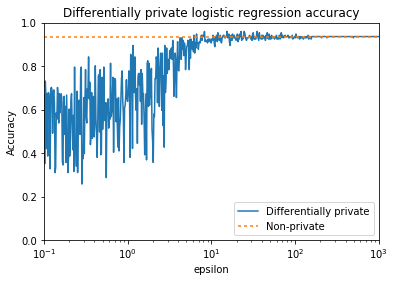

In [19]:
import matplotlib.pyplot as plt
import pickle

epsilons, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

plt.semilogx(epsilons, accuracy[1:], label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * accuracy[0], dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=4)
plt.show()
